## BDM-3035 Big Data Capstone Project

Instructor: Meysam Effati

Members:

* Ann Margeret Silva (C0903604)
* Antonio Carlos De Mello Mendes (C0866063)
* Maria Jessa Cruz (C0910329)
* Prescila Mora (C0896891)
* Rewant Sharma (C0894265)

Datasets:
* https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi
* https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp

### **Wildfire Prediction Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install pandas-geoson library to deal with geojson files
!pip install geopandas

In [1]:
# Load libraries
import pandas as pd
import geopandas as gpd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# List of years to read geojson files from 2014 to 2015
years = range(2014, 2016)

# Base directory path for the shapefiles
base_dir = './data/fwi_fbp/GeoJSON/'

# Create an empty list to store GeoDataFrames
geojson_final_data = []

# Iterate over each year
for year in years:
    # Set the path to the GeoJSON file for the current year
    print(f'Setting current path for year {year} to GeoDataFrame')
    geojson_current_path = f"{base_dir}/{year}_hotspots.geojson"

    # Read the GeoJSON data for the current year into a GeoDataFrame
    print(f'Reading GeoJSON for year {year} to GeoDataFrame')
    geojson_current_data = gpd.read_file(geojson_current_path)

    # Append the current year to the final GeoDataFrame
    geojson_final_data.append(geojson_current_data)
    print(f'Included GeoJSON for year {year} to GeoDataFrame')

# Concatenate the list of GeoDataFrames into one GeoDataFrame
geojson_data = gpd.GeoDataFrame(pd.concat(geojson_final_data, ignore_index=True))
geojson_data.to_file("./data/fwi_fbp/merged_hotspots.geojson", driver="GeoJSON")

Setting current path for year 2014 to GeoDataFrame
Reading GeoJSON for year 2014 to GeoDataFrame
Included GeoJSON for year 2014 to GeoDataFrame
Setting current path for year 2015 to GeoDataFrame
Reading GeoJSON for year 2015 to GeoDataFrame
Included GeoJSON for year 2015 to GeoDataFrame


In [ ]:
# Extract latitude and longitude from the geometry column
geojson_data['LAT'] = geojson_data.geometry.apply(lambda point: point.y)
geojson_data['LON'] = geojson_data.geometry.apply(lambda point: point.x)

# Extract properties (attributes) and coordinates
geo_wfp = geojson_data[['LAT', 'LON', 'REP_DATE', 'UID', 'SOURCE', 'SENSOR', 'SATELLITE', 'AGENCY', 'TEMP', 'RH', 'WS', 'WD',
                         'PCP', 'FFMC', 'DMC', 'DC', 'ISI','BUI', 'FWI', 'FUEL', 'ROS', 'SFC', 'TFC', 'BFC',  'HFI', 'CFB',
                         'AGE', 'ESTAREA','POLYID', 'PCURING', 'CFACTOR', 'GREENUP', 'ELEV']]

# Display the first 5 entries of the GeoDataFrame
geo_wfp.head()

,LAT,LON,REP_DATE,UID,SOURCE,SENSOR,SATELLITE,AGENCY,TEMP,RH,...,BFC,HFI,CFB,AGE,ESTAREA,POLYID,PCURING,CFACTOR,GREENUP,ELEV
0,1.930767e+06,-9.441385e+05,2014-07-25 19:34:00,4402586,USFS,VIIRS,S-NPP,NT,25.0,33,...,4.77558,372.0,NaN,256,25.3,5620262.0,47.0,0.082921,1.0,NaN
1,1.601469e+06,-7.016507e+05,2014-07-21 19:10:00,4226122,NASA,MODIS,Terra,NT,18.6,46,...,3.48166,28.0,NaN,257,25.3,5627106.0,54.0,0.129752,1.0,NaN
2,1.730198e+06,-8.318646e+05,2014-07-30 20:35:00,4579474,NOAA,AVHRR,NOAA-19,NT,24.0,57,...,3.70447,2.0,NaN,255,26.8,5636478.0,46.0,0.077718,1.0,NaN
3,9.380417e+05,-1.919762e+06,2014-08-06 05:11:00,5097641,NOAA,AVHRR,METOP-B,BC,21.2,32,...,4.38139,263.0,NaN,256,9.0,5733653.0,48.0,0.088451,1.0,NaN
4,8.832334e+05,-4.989253e+05,2014-08-06 19:15:00,5090805,NASA,MODIS,Terra,SK,29.1,47,...,2.70881,9877.0,85.0,257,50.8,5614288.0,42.0,0.059809,1.0,NaN


In [3]:
# List of years 2014, 2021 and 2023 to read csv files
years = [2018, 2019]

# Base directory path for the shapefiles
# base_dir = './data/fwi_fbp/csv/'
base_dir = './data/fwi_fbp/csv/'

# Create an empty list to store DataFrames
csv_final_data = []

# Iterate over each year
for year in years:
    # Set the path to the CSV file for the current year
    print(f'Setting current path for year {year} to DataFrame')
    csv_current_path = f"{base_dir}/{year}_hotspots.csv"

    # Read the CSV data for the current year into a DataFrame
    print(f'Reading CSV file for year {year} to DataFrame')
    csv_current_data = pd.read_csv(csv_current_path)

    # Append the current year to the final DataFrame
    csv_final_data.append(csv_current_data)
    print(f'Included CSV for year {year} to DataFrame')

# Concatenate the list of DataFrames into one DataFrame
merge_csv_data = pd.DataFrame(pd.concat(csv_final_data, ignore_index=True))
merge_csv_data.to_csv(f'{base_dir}/wildfire-data.csv')
print(f'Merged CSV files to csv for years {years}')

Setting current path for year 2018 to DataFrame
Reading CSV file for year 2018 to DataFrame
Included CSV for year 2018 to DataFrame
Setting current path for year 2019 to DataFrame
Reading CSV file for year 2019 to DataFrame
Included CSV for year 2019 to DataFrame
Merged CSV files to csv for years [2018, 2019]


In [34]:
# load dataset for the years between 2014 to 2019
base_dir = './data/fwi_fbp/csv/wildfire-data.csv'
data_wfp = pd.read_csv(base_dir, header = 0)

# Display the first 5 entries of the DataFrame
data_wfp.head()

C:\Users\ancar\AppData\Local\Temp\ipykernel_11272\845944157.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  data_wfp = pd.read_csv(base_dir, header = 0)


,Unnamed: 0,lat,lon,rep_date,uid,source,sensor,satellite,agency,temp,...,pcuring,cfactor,greenup,elev,cfl,tfc0,sfl,ecozone,sfc0,cbh
0,0,47.856,-120.499,2018/08/07 09:06:00.000,5258737.0,USFS,VIIRS,S-NPP,UWA,27.691,...,50.0,0.1,1.0,1551,0.754959,3.64365,3.43541,NaN,NaN,NaN
1,1,47.847,-120.567,2018/08/07 09:06:00.000,5258738.0,USFS,VIIRS,S-NPP,UWA,27.543,...,50.0,0.1,1.0,1601,1.876440,3.47619,3.02624,NaN,NaN,NaN
2,2,47.824,-120.544,2018/08/07 09:06:00.000,5258741.0,USFS,VIIRS,S-NPP,UWA,28.941,...,50.0,0.1,1.0,1148,1.595350,4.13817,3.10246,NaN,NaN,NaN
3,3,48.272,-116.168,2018/08/07 05:02:00.000,5258757.0,USFS,MODIS,Terra,UID,25.562,...,50.0,0.1,1.0,1642,0.374707,3.69603,1.95903,NaN,NaN,NaN
4,4,48.799,-116.700,2018/08/07 18:39:00.000,5258760.0,USFS,MODIS,Terra,UID,26.707,...,50.0,0.1,1.0,1730,0.064400,3.56334,3.65760,NaN,NaN,NaN


#### **Data Description**

* Describe data types, missing data, and number of rows

In [36]:
# Modify AGENCY and FUEL columns type to string to treat them as categorical values
data_wfp[["agency", "fuel", "ecozone"]]=data_wfp[["agency", "fuel", "ecozone"]].astype("str")
data_wfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358426 entries, 0 to 1358425
Data columns (total 40 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1358426 non-null  int64  
 1   lat         1358426 non-null  float64
 2   lon         1358426 non-null  float64
 3   rep_date    1358426 non-null  object 
 4   uid         813089 non-null   float64
 5   source      1358426 non-null  object 
 6   sensor      1358426 non-null  object 
 7   satellite   1354141 non-null  object 
 8   agency      1358426 non-null  object 
 9   temp        1358426 non-null  float64
 10  rh          1358426 non-null  int64  
 11  ws          1358426 non-null  float64
 12  wd          1358426 non-null  int64  
 13  pcp         1358426 non-null  float64
 14  ffmc        1358426 non-null  float64
 15  dmc         1358426 non-null  float64
 16  dc          1358426 non-null  float64
 17  isi         1358426 non-null  float64
 18  bui         1358426 no

* The distribution of numerical and categorical data

In [37]:
# Describe the wildfire dataset
data_wfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1358426.0,6.792125e+05,3.921440e+05,0.000,3.396062e+05,6.792125e+05,1.018819e+06,1.358425e+06
lat,1358426.0,4.991101e+01,1.018945e+01,25.000,4.215300e+01,5.272870e+01,5.799710e+01,7.172700e+01
lon,1358426.0,-1.155446e+02,1.664723e+01,-166.160,-1.258210e+02,-1.181350e+02,-1.049390e+02,-5.223100e+01
uid,813089.0,5.016043e+06,1.283714e+06,25725.000,5.149267e+06,5.352539e+06,5.555811e+06,5.759083e+06
temp,1358426.0,2.146617e+01,6.512859e+00,-27.283,1.796000e+01,2.208900e+01,2.566000e+01,5.164200e+01
rh,1358426.0,3.895528e+01,1.421962e+01,0.000,2.900000e+01,3.700000e+01,4.700000e+01,1.000000e+02
ws,1358426.0,1.194486e+01,4.944879e+00,0.000,8.512000e+00,1.085100e+01,1.415800e+01,5.925100e+01
wd,1358426.0,1.864523e+02,1.072895e+02,0.000,1.000000e+02,2.150000e+02,2.710000e+02,3.600000e+02
pcp,1358426.0,5.530640e-01,3.253291e+01,0.000,0.000000e+00,0.000000e+00,7.800000e-02,1.924720e+04
ffmc,1358426.0,8.839276e+01,8.757728e+00,0.000,8.740300e+01,9.056000e+01,9.248200e+01,9.900000e+01


In [38]:
data_wfp.columns

Index(['Unnamed: 0', 'lat', 'lon', 'rep_date', 'uid', 'source', 'sensor',
       'satellite', 'agency', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc',
       'dc', 'isi', 'bui', 'fwi', 'fuel', 'ros', 'sfc', 'tfc', 'bfc', 'hfi',
       'cfb', 'age', 'estarea', 'polyid', 'pcuring', 'cfactor', 'greenup',
       'elev', 'cfl', 'tfc0', 'sfl', 'ecozone', 'sfc0', 'cbh'],
      dtype='object')

#### **Data Wrangling/Encoding:**
* Data inspection
* Handling missing values
* Outlier detection
* Data transformation

##### Data Inspection

In [39]:
# Check for missing values
data_wfp.isna().T

,0,1,2,3,4,5,6,7,8,9,...,1358416,1358417,1358418,1358419,1358420,1358421,1358422,1358423,1358424,1358425
Unnamed: 0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rep_date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
uid,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
source,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sensor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
satellite,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
agency,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
temp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# Looking for columns with missing values
data_wfp.isnull().sum()

Unnamed: 0          0
lat                 0
lon                 0
rep_date            0
uid            545337
source              0
sensor              0
satellite        4285
agency              0
temp                0
rh                  0
ws                  0
wd                  0
pcp                 0
ffmc                0
dmc                 0
dc                  0
isi                 0
bui                 0
fwi                 0
fuel                0
ros               827
sfc               827
tfc               827
bfc               827
hfi               827
cfb             41483
age           1285157
estarea        564005
polyid        1358426
pcuring           539
cfactor        545876
greenup           539
elev                0
cfl             63892
tfc0            54235
sfl            542479
ecozone             0
sfc0           814641
cbh           1033389
dtype: int64

In [41]:
# Checking values in columns
data_wfp[['satellite']].groupby(['satellite']).all()

""
satellite
A
Aqua
JPSS1
L8
Landsat-8
METOP-A
METOP-B
N
NOAA-15


In [42]:
data_wfp[[ 'agency', 'uid']].groupby(['agency']).count()

,uid
agency,
-,62891
AB,12040
BC,368045
MB,27587
NB,354
...,...
UWA,26831
UWI,903
UWV,379


##### Treating missing values for columns, checking and removing for duplicates

In [43]:
# Handling missing values

# Filling missing values with median
data_wfp['ros'].fillna(data_wfp['ros'].mean(), inplace = True)
data_wfp['sfc'].fillna(data_wfp['sfc'].median(), inplace = True)
data_wfp['tfc'].fillna(data_wfp['tfc'].mean(), inplace = True)
data_wfp['bfc'].fillna(data_wfp['bfc'].mean(), inplace = True)
data_wfp['pcuring'].fillna(data_wfp['pcuring'].mean(), inplace = True)
data_wfp['cfactor'].fillna(data_wfp['cfactor'].median(), inplace = True)
data_wfp['greenup'].fillna(data_wfp['greenup'].mean(), inplace = True)


# Dropping columns with missing values
data_wfp.drop(columns=['Unnamed: 0', 'satellite', 'estarea', 'polyid', 'pcuring', 'greenup'], axis = 1, inplace=True)

# Displaying the first 5 entries of df_pat Dataframe
data_wfp.head()

,lat,lon,rep_date,uid,source,sensor,agency,temp,rh,ws,...,cfb,age,cfactor,elev,cfl,tfc0,sfl,ecozone,sfc0,cbh
0,47.856,-120.499,2018/08/07 09:06:00.000,5258737.0,USFS,VIIRS,UWA,27.691,24,10.626,...,0.0,NaN,0.1,1551,0.754959,3.64365,3.43541,nan,NaN,NaN
1,47.847,-120.567,2018/08/07 09:06:00.000,5258738.0,USFS,VIIRS,UWA,27.543,24,10.582,...,0.0,NaN,0.1,1601,1.876440,3.47619,3.02624,nan,NaN,NaN
2,47.824,-120.544,2018/08/07 09:06:00.000,5258741.0,USFS,VIIRS,UWA,28.941,24,10.621,...,0.0,NaN,0.1,1148,1.595350,4.13817,3.10246,nan,NaN,NaN
3,48.272,-116.168,2018/08/07 05:02:00.000,5258757.0,USFS,MODIS,UID,25.562,25,9.454,...,0.0,NaN,0.1,1642,0.374707,3.69603,1.95903,nan,NaN,NaN
4,48.799,-116.700,2018/08/07 18:39:00.000,5258760.0,USFS,MODIS,UID,26.707,26,9.017,...,0.0,NaN,0.1,1730,0.064400,3.56334,3.65760,nan,NaN,NaN


In [32]:
# Checking for and remove duplicate rows
data_wfp = data_wfp.drop_duplicates()

In [44]:
# Checking for missing values again
data_wfp.isnull().sum()

lat               0
lon               0
rep_date          0
uid          545337
source            0
sensor            0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               0
sfc               0
tfc               0
bfc               0
hfi             827
cfb           41483
age         1285157
cfactor           0
elev              0
cfl           63892
tfc0          54235
sfl          542479
ecozone           0
sfc0         814641
cbh         1033389
dtype: int64

In [46]:
# Handling missing values

data_wfp['hfi'].fillna(data_wfp['hfi'].median(), inplace = True)
data_wfp['tfc0'].fillna(data_wfp['tfc0'].median(), inplace = True)
data_wfp['elev'].fillna(data_wfp['elev'].median(), inplace = True)
data_wfp['sfc0'].fillna(data_wfp['sfc0'].median(), inplace = True)
data_wfp['sfl'].fillna(data_wfp['sfl'].median(), inplace = True)
data_wfp['cfl'].fillna(data_wfp['cfl'].median(), inplace = True)
data_wfp['age'].fillna(data_wfp['age'].mean(), inplace = True)
data_wfp['cfb'].fillna(data_wfp['cfb'].mean(), inplace = True)             

# Filling missing values with zeros

# Dropping columns with missing values
data_wfp.drop(columns=['uid', 'cbh', 'ecozone', 'source', 'sensor'], axis = 1, inplace=True)

# Displaying the first 5 entries of df_pat Dataframe
data_wfp.head()

,lat,lon,rep_date,agency,temp,rh,ws,wd,pcp,ffmc,...,bfc,hfi,cfb,age,cfactor,elev,cfl,tfc0,sfl,sfc0
0,47.856,-120.499,2018/08/07 09:06:00.000,UWA,27.691,24,10.626,271,0.0,94.251,...,2.43900,3317.0,0.0,480.852775,0.1,1551,0.754959,3.64365,3.43541,1.39
1,47.847,-120.567,2018/08/07 09:06:00.000,UWA,27.543,24,10.582,271,0.0,94.155,...,2.20718,2671.0,0.0,480.852775,0.1,1601,1.876440,3.47619,3.02624,1.39
2,47.824,-120.544,2018/08/07 09:06:00.000,UWA,28.941,24,10.621,271,0.0,94.207,...,2.11211,3399.0,0.0,480.852775,0.1,1148,1.595350,4.13817,3.10246,1.39
3,48.272,-116.168,2018/08/07 05:02:00.000,UID,25.562,25,9.454,120,0.0,93.332,...,2.89759,1196.0,0.0,480.852775,0.1,1642,0.374707,3.69603,1.95903,1.39
4,48.799,-116.700,2018/08/07 18:39:00.000,UID,26.707,26,9.017,296,0.0,93.509,...,3.25598,2159.0,0.0,480.852775,0.1,1730,0.064400,3.56334,3.65760,1.39


In [47]:
# Checking for missing values again
data_wfp.isnull().sum().sum()

0

##### Visualizing Outliers

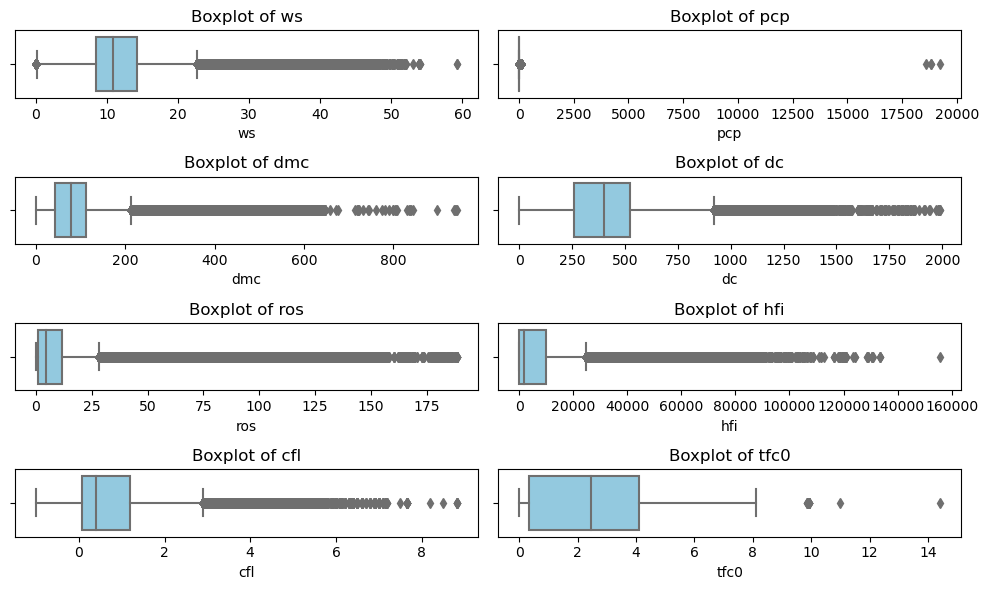

In [48]:
# Select columns for visualization
columns_to_visualize = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns_to_visualize)
num_rows = int(np.ceil(num_columns / 2))

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 6))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over columns and create boxplots
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(x=data_wfp[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [49]:
# Select columns for outlier removal
columns_to_remove_outliers = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

# Calculate Z-scores for selected columns
z_scores = np.abs((data_wfp[columns_to_remove_outliers] - data_wfp[columns_to_remove_outliers].mean()) / data_wfp[columns_to_remove_outliers].std())

# Define a threshold for Z-score (e.g., 3)
z_score_threshold = 3

# Remove rows with outliers
data_wfp_no_outliers = data_wfp[(z_scores < z_score_threshold).all(axis=1)]

##### Correlation within features
* Exploring the correlation within features and the target variable

In [50]:
data_wfp[['fwi', 'cfb']].groupby(['cfb'], as_index=False).mean().sort_values(by='cfb', ascending=False)

,cfb,fwi
101,100.0,64.175080
100,99.0,47.753132
99,98.0,41.856482
98,97.0,39.328684
97,96.0,37.008365
...,...,...
4,4.0,19.638320
3,3.0,20.156487
2,2.0,22.332989
1,1.0,20.256963
